**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [305]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
os.environ["PUIDATA"] = "%s/PUIDATA"%os.getenv("HOME")
print("PUIdata", os.getenv("PUIDATA"))
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import math

pd.options.mode.chained_assignment = None 
%matplotlib inline
%pylab inline

PUIdata /nfshome/mv1742/PUIDATA
Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [306]:
s = json.load( open(os.getenv('PUIDATA')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  mplDeprecation)


In [307]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''

    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)

# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars use the functions created above

In [420]:
np.random.rand()
Y=np.zeros(10)
x = np.linspace(10,100,num=10)
slope = 0.90
counter = 0
#Y=line(slope,x)+np.random.rand()*100
for i in x:
    #print(i+10)
    Y[counter]=line(slope,i+10)+np.random.rand()*20
    counter+=1
    #print(counter)
print(Y)

[  30.28919173   31.79785205   53.85353246   57.9946174    66.41739067
   79.50314895   90.27895731   96.22998758   91.89996285  113.964785  ]


In [421]:
x

array([  10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,   90.,  100.])

In [422]:
Y

array([  30.28919173,   31.79785205,   53.85353246,   57.9946174 ,
         66.41739067,   79.50314895,   90.27895731,   96.22998758,
         91.89996285,  113.964785  ])

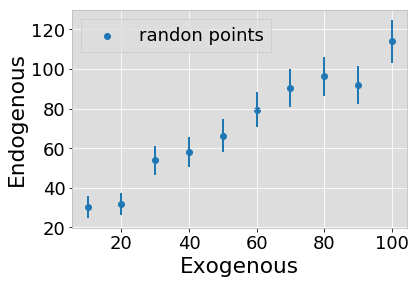

In [423]:

pl.scatter(x,Y, label = "randon points")
pl.errorbar(x, Y, yerr=errors(Y), fmt='.')
pl.xlabel("Exogenous")
pl.ylabel("Endogenous")
pl.legend();

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [424]:
print('y:',Y)

y: [  30.28919173   31.79785205   53.85353246   57.9946174    66.41739067
   79.50314895   90.27895731   96.22998758   91.89996285  113.964785  ]


In [425]:
print('x:',x)
X_addconstantresult = sm.add_constant(x)
print('x array with constant b_i ([b, x]) \n',X_addconstantresult)

x: [  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]
x array with constant b_i ([b, x]) 
 [[   1.   10.]
 [   1.   20.]
 [   1.   30.]
 [   1.   40.]
 [   1.   50.]
 [   1.   60.]
 [   1.   70.]
 [   1.   80.]
 [   1.   90.]
 [   1.  100.]]


In [426]:
X_addconstantresult = sm.add_constant(x)
print('x array with constant b_i ([b, x]) \n',X_addconstantresult)

x array with constant b_i ([b, x]) 
 [[   1.   10.]
 [   1.   20.]
 [   1.   30.]
 [   1.   40.]
 [   1.   50.]
 [   1.   60.]
 [   1.   70.]
 [   1.   80.]
 [   1.   90.]
 [   1.  100.]]


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [427]:
lm = smf.OLS(Y, X_addconstantresult).fit()
lm.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     206.4
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           5.38e-07
Time:                        08:33:41   Log-Likelihood:                -30.532
No. Observations:                  10   AIC:                             65.06
Df Residuals:                       8   BIC:                             65.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         21.3691      3.915      5.458      0.001        12.341    30.397
x1             0.9064      0.063     14.366      0.000         0.761     1.052
==============================================================================
Omnibus:                        3.953   Durbin-Watson:                   2.389
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.857
Skew:                          -1.055   Prob(JB):                        0.395
Kurtosis:                       2.945   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [428]:
predicted = lm.predict()

In [429]:
#BECAUSSE AN INTERCEPT BETTER FITS THE DATA
#THE WRONG WAY WOULD BE HAVING NO INTERCEPT?
smfit = smf.OLS(Y, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     409.9
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           8.15e-09
Time:                        08:33:42   Log-Likelihood:                -38.296
No. Observations:                  10   AIC:                             78.59
Df Residuals:                       9   BIC:                             78.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.2117      0.060     20.245      0.000         1.076     1.347
==============================================================================
Omnibus:                        2.002   Durbin-Watson:                   0.563
Prob(Omnibus):                  0.368   Jarque-Bera (JB):                0.798
Skew:                          -0.689   Prob(JB):                        0.671
Kurtosis:                       2.874   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [430]:
wrongpredicted=smfit.predict()

# 4. plot the data (as points) and both statsmodels fits

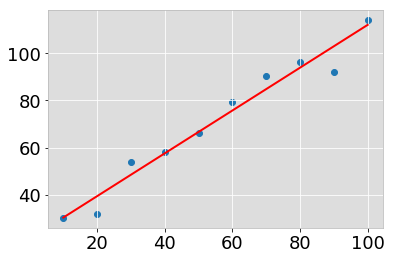

In [431]:
plt.scatter(x,Y)
plt.plot(x,predicted,'r-')
plt.show()

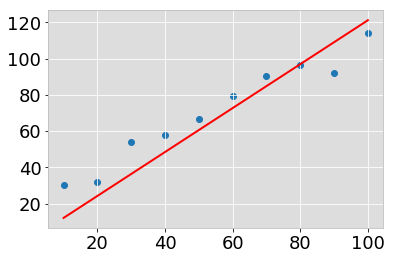

In [432]:
plt.scatter(x,Y)
plt.plot(x,wrongpredicted,'r-')
plt.show()

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

In [433]:
np.random.rand()
Y2=np.zeros(10)
x2 = np.linspace(10,100,num=10)
slope = 0.90
counter = 0
intercept = slope*150
print(intercept)
#Y2=line(slope,x2,b=intercept)
for i in x:
    #print(i+10)
    Y2[counter]=line(slope,i+10, b=intercept)+np.random.rand()*20
    counter+=1
#print(counter)
print(Y2)

135.0
[ 156.31290306  170.99942418  187.21162702  199.81244301  190.31641711
  217.84621733  209.96109846  235.75428286  236.37068545  251.08915305]


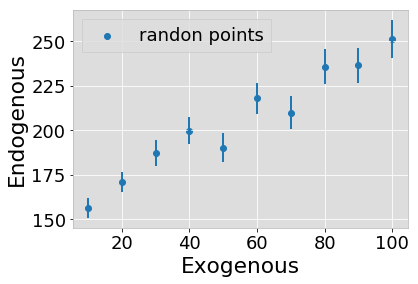

In [434]:
pl.scatter(x2,Y2, label = "randon points")
pl.errorbar(x2, Y2, yerr=errors(Y), fmt='.')
pl.xlabel("Exogenous")
pl.ylabel("Endogenous")
pl.legend();

# 6. repeat step 3

In [435]:
#RIGHT 
print('y:',Y2)
print('x:',x2)
X2_addconstantresult = sm.add_constant(x2)
print('x2 array with constant b_i ([b, x]) \n',X2_addconstantresult)
lm2 = smf.OLS(Y2, X2_addconstantresult).fit()
lm2.summary()
predicted2 = lm2.predict()
#WRONG
smfit2 = smf.OLS(Y2, x2).fit()
smfit2.summary()
wrongpredicted2=smfit2.predict()

y: [ 156.31290306  170.99942418  187.21162702  199.81244301  190.31641711
  217.84621733  209.96109846  235.75428286  236.37068545  251.08915305]
x: [  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]
x2 array with constant b_i ([b, x]) 
 [[   1.   10.]
 [   1.   20.]
 [   1.   30.]
 [   1.   40.]
 [   1.   50.]
 [   1.   60.]
 [   1.   70.]
 [   1.   80.]
 [   1.   90.]
 [   1.  100.]]


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


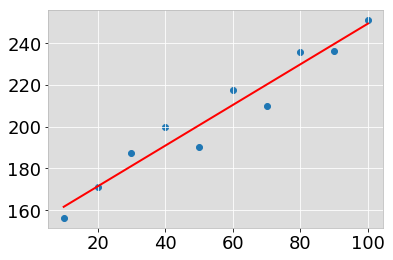

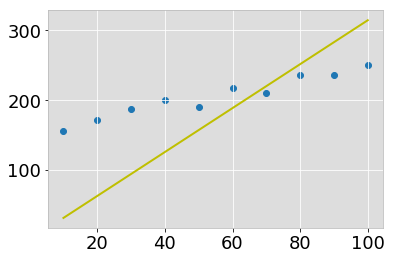

In [436]:
plt.scatter(x2,Y2)
plt.plot(x2,predicted2,'r-')
plt.show()
plt.scatter(x2,Y2)
plt.plot(x2,wrongpredicted2,'y-')
plt.show()

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [437]:
#create weights

In [438]:
a =errors(Y2)
a

array([ 12.50251587,  13.07667481,  13.68252999,  14.13550293,
        13.79552163,  14.7596144 ,  14.49003445,  15.354292  ,
        15.37435155,  15.84579291])

In [439]:
Y2.size

10

In [440]:
#from numpy.linalg import inv
inverse = 1/a
inverse

array([ 0.0799839 ,  0.07647204,  0.0730859 ,  0.07074386,  0.07248729,
        0.06775245,  0.06901295,  0.06512837,  0.06504339,  0.06310823])

In [441]:
nsample = Y2.size

#RIGHT 
#WLS knowing the true variance ratio of heteroscedasticity
mod_wls = sm.WLS(Y2, X2_addconstantresult, weights=inverse)
res_wls = mod_wls.fit()
res_wls.summary
wlspredicted2 = res_wls.predict()
#WRONG
wrong_mod_wls = sm.WLS(Y2, X2_addconstantresult, weights=inverse)
wrong_res_wls = mod_wls.fit()
wrong_res_wls.summary
wrong_wlspredicted2 = res_wls.predict()


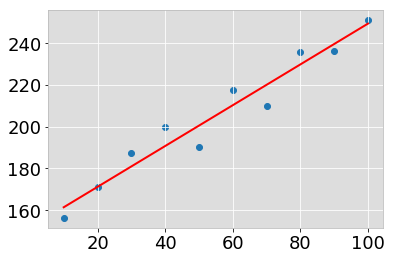

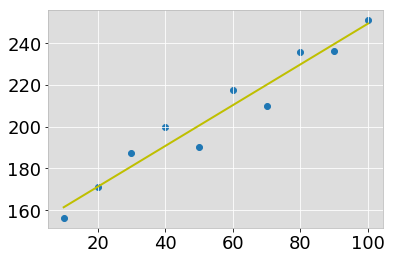

In [442]:
plt.scatter(x2,Y2)
plt.plot(x2,wlspredicted2,'r-')
plt.show()
plt.scatter(x2,Y2)
plt.plot(x2,wrong_wlspredicted2,'y-')
plt.show()

In [443]:
res_wls.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.945
Model:                            WLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     137.8
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           2.54e-06
Time:                        08:33:51   Log-Likelihood:                -33.349
No. Observations:                  10   AIC:                             70.70
Df Residuals:                       8   BIC:                             71.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        151.6166      5.028     30.152      0.000       140.021   163.212
x1             0.9788      0.083     11.738      0.000         0.787     1.171
==============================================================================
Omnibus:                        1.706   Durbin-Watson:                   3.092
Prob(Omnibus):                  0.426   Jarque-Bera (JB):                0.850
Skew:                          -0.269   Prob(JB):                        0.654
Kurtosis:                       1.677   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

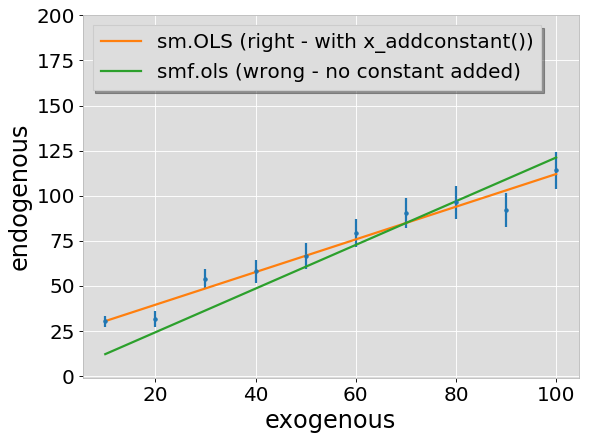

In [475]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
pl.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
smfmodel = smf.ols('Y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, Y, yerr=errors(x), fmt='.')
ax1 = pl.plot(x, lm.fittedvalues, '-')
ax2 = pl.plot(x, smfit.fittedvalues, '-')
plt.ylim([-1, 200])
pl.legend(("sm.OLS (right - with x_addconstant())", "smf.ols (wrong - no constant added)"),
           loc='upper left', shadow=True)
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();

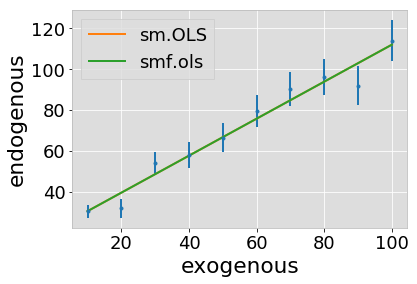

In [478]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('Y ~ x + const', data={'x':x, 'y':Y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, Y, yerr=errors(x), fmt='.')
pl.plot(x, lm.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();